In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv('titanic.csv')

In [83]:
df.head(4)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1


In [84]:
df.shape

(891, 4)

<Axes: xlabel='number'>

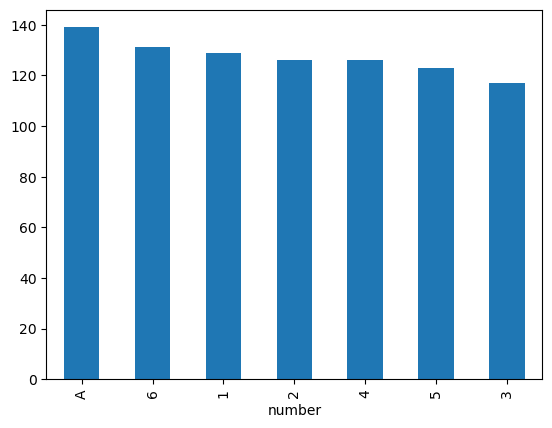

In [85]:
df['number'].value_counts().plot(kind='bar')

In [86]:
# extract the number from the colum and show in another colum 
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [87]:
# extract the categorical value 
df['categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)

In [88]:
df.head(5)

,Cabin,Ticket,number,Survived,number_numerical,categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [89]:
# extract the numerical part from the columns
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_num'] = pd.to_numeric(df['cabin_num'], errors='coerce')

# extract the catagorical colums 
df['cabin_cat'] = df['Cabin'].str[0]

<Axes: xlabel='cabin_cat'>

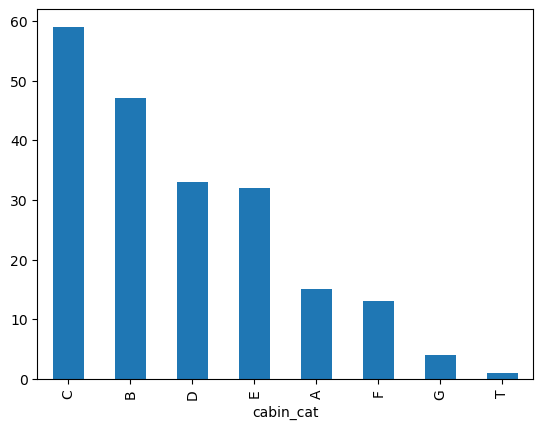

In [90]:
df['cabin_cat'].unique()
df['cabin_cat'].value_counts().plot(kind='bar')

In [95]:
# extract the numerical part 
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce',downcast='integer')

# extract the categorical part of the columns tickets by apply custom logic
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [92]:
df

,Cabin,Ticket,number,Survived,number_numerical,categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171,A/5
1,C85,PC 17599,3,1,3.0,NaN,85.0,C,17599,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282,STON/O2.
3,C123,113803,3,1,3.0,NaN,123.0,C,113803,113803
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450,373450
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536,211536
887,B42,112053,3,1,3.0,NaN,42.0,B,112053,112053
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607,W./C.
889,C148,111369,2,1,2.0,NaN,148.0,C,111369,111369
